In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import distinctipy as dpy

In [5]:

df_pre = pd.read_csv("./pre_tsne_emb46.csv")
df_emb = pd.read_csv("./emb_tsne_emb46.csv")
df_rec = pd.read_csv("./rec_tsne_emb46.csv")

df_pre

,tsne0,tsne1,label
0,37.821377,5.237927,cerebral cortex - glial cells
1,38.793636,-3.481731,cerebral cortex - glial cells
2,34.430614,3.244831,cerebral cortex - glial cells
3,36.047745,4.409559,cerebral cortex - glial cells
4,41.505160,5.668094,cerebral cortex - glial cells
...,...,...,...
15995,-10.339036,4.767113,breast - adipocytes
15996,-20.381006,3.774526,breast - adipocytes
15997,-16.678188,-4.607583,breast - adipocytes
15998,-10.970190,2.103346,breast - adipocytes


C:\Users\Sam\AppData\Local\Temp\ipykernel_22404\3959741425.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cell_df['tsne0'], cell_df['tsne1'], c=cell_colors[cell], s=0.5)


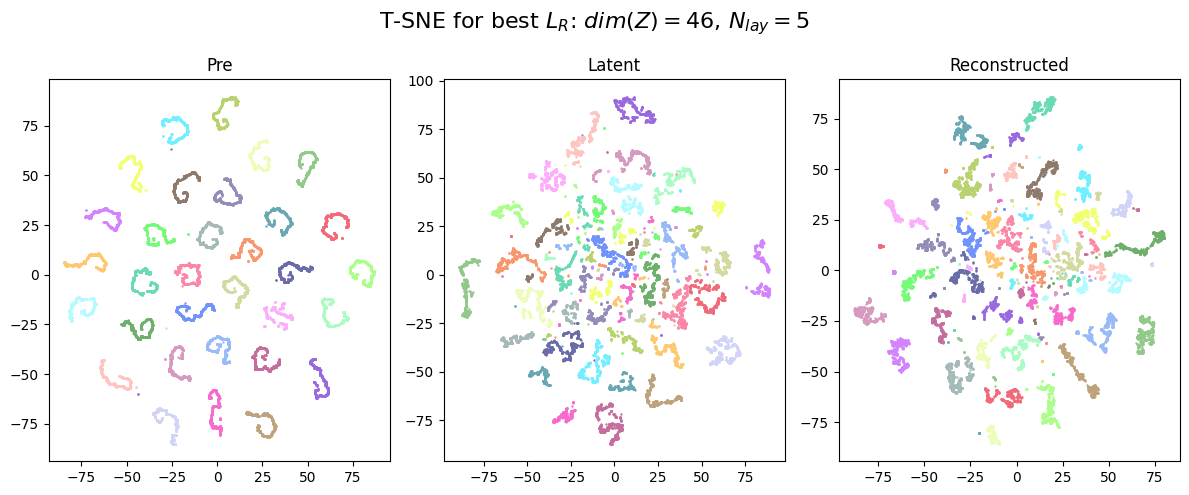

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

cell_types = df_pre['label'].unique()
n_types = len(cell_types)
cell_colors = dpy.get_colors(n_types, pastel_factor=0.7)
cell_colors = {cell : cell_colors[i] for i, cell in enumerate(cell_types)}

def plot(ax, df, title):
    for cell in cell_types:
        cell_df = df[df_emb['label'] == cell]
        ax.scatter(cell_df['tsne0'], cell_df['tsne1'], c=cell_colors[cell], s=0.5)
    
    ax.set_title(title)

    

plot(ax1, df_pre, "Pre")
plot(ax2, df_emb, "Latent")
plot(ax3, df_rec, "Reconstructed")

fig.suptitle("T-SNE for best $L_R$: $dim(Z)=46$, $N_{lay}=5$", fontsize=16)
fig.tight_layout()

plt.savefig("T-SNE for Best Model.png", dpi=600)